## Compare rates from receiving rate pickle and packet list pickle

In [1]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt

# Warning: only do with flows with one ssrc!

In [6]:
def calculate_receiving_rate_from_packet_list(df_packets, interval=60):
    #calculates rate for given packet list df_packets for given interval for the first ssrc
    
    ssrc = df_packets["ssrc"].unique()[0]
    df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
    df["arrival_time_ms"] = df["arrival_time_ms"].astype('datetime64[ms]')
    df = df.set_index("arrival_time_ms")
    
    def calculate_rate(series):
#         interval = 100
        return (series.sum() * 8 * 1000 )/ interval

    receiving_rate_series = df.resample(f"{interval}L").agg({"payload_size": calculate_rate})
    
    return receiving_rate_series

## Take list from receiving rate pickle

In [7]:
pickle_path = "/home/dena/Documents/Gym_RTC/gym-example/receiving_rate_per_episode.pickle"
l_rate = pd.read_pickle(pickle_path)
time_step = 100
max_num_episodes = 3

episode = 0
epoch = 0
            
#Define rate
df_rate = pd.DataFrame(l_rate[episode][epoch]["receiving_rate"], columns=["receiving_rate", "arrival_time_ms"])
df_rate["receiving_rate"] = df_rate["receiving_rate"]/1000
t = np.arange(len(df_rate))*time_step
df_rate["time"] = t
df_rate.set_index("time", inplace=True)
df_rate

,receiving_rate,arrival_time_ms
time,,
0,0.000000,NaN
100,136.266667,106.0
200,313.066667,173.0
300,255.466667,230.0
400,228.533333,278.0
...,...,...
99600,319.066667,59795.0
99700,307.200000,59860.0
99800,344.133333,59931.0


In [8]:
pickle_path2 = "/home/dena/Documents/Gym_RTC/gym-example/record_list_of_received_packets.pickle"
l_packets = pd.read_pickle(pickle_path2)

time_step = 60
max_num_episodes = 3
to_plot_big = []
episode = 0
epoch = 0

trace_file = l_packets[episode][epoch]["trace"].split("/")[-1]
df_packets = pd.DataFrame(l_packets[episode][epoch]["list_of_packets"])

for i in range(len(df_packets.ssrc.unique())):
    print(i)
    ssrc = df_packets["ssrc"].unique()[i]
    df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])

0
1


In [9]:
df

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
885,24735,24,0,1188,98,21694,2,195939069
889,24805,24,0,732,98,21824,3,195939069
890,24831,24,0,922,98,21829,4,195939069
893,24897,24,0,828,98,21904,5,195939069
895,24944,24,0,828,98,21929,6,195939069
...,...,...,...,...,...,...,...,...
2129,58260,24,0,1220,98,55214,171,195939069
2135,58414,24,0,388,98,55434,174,195939069
2136,58426,24,0,388,98,55434,175,195939069
2137,58444,24,0,605,98,55439,176,195939069


In [10]:
time_step = 60
rates2 = calculate_rate_from_packet_list(df, time_step)["payload_size"]/1000
rates1 = df_rate["receiving_rate"]

NameError: name 'calculate_rate_from_packet_list' is not defined

In [11]:
rates1

NameError: name 'rates1' is not defined

In [12]:
rates2

NameError: name 'rates2' is not defined

In [13]:
a = rates2.reset_index()["payload_size"]
a

NameError: name 'rates2' is not defined

In [14]:
b = rates1[2:].reset_index()["receiving_rate"]
b

NameError: name 'rates1' is not defined

In [15]:
plot_cdf(b-a, "rate difference")

NameError: name 'b' is not defined

In [16]:
plot_cdf_multiple(
                  [rates1, rates2],
                  x_label="Receiving rates packets vs. counter",
                  legend=["From counter", "From packet list"]
                 )
plt.xlim(0,450)

NameError: name 'rates1' is not defined

## Calculate sending rate

In [17]:
def calculate_sending_rate_from_packet_list(df_packets, interval=60):
    #calculates rate for given packet list df_packets for given interval for the first ssrc
    
    ssrc = df_packets["ssrc"].unique()[0]
    df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
    df["send_time_ms"] = df["send_time_ms"].astype('datetime64[ms]')
    df = df.set_index("send_time_ms")
    
    def calculate_rate(series):
        return (series.sum() * 8 * 1000)/ interval

    sending_rate_series = df.resample(f"{interval}L").agg({"payload_size": calculate_rate})
    
    return sending_rate_series

In [18]:
pickle_path2 = "/home/dena/Documents/Gym_RTC/gym-example/record_list_of_received_packets.pickle"
l_packets = pd.read_pickle(pickle_path2)

episode = 0
epoch = 0

trace_file = l_packets[episode][epoch]["trace"].split("/")[-1]
df_packets = pd.DataFrame(l_packets[episode][epoch]["list_of_packets"])

In [19]:
df_packets

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,106,24,0,1022,126,35,1,12648429
1,135,24,0,1022,126,55,2,12648429
2,164,28,0,1019,126,75,3,12648429
3,173,24,0,307,126,90,4,12648429
4,185,24,0,369,126,105,5,12648429
...,...,...,...,...,...,...,...,...
2188,59860,24,0,1290,126,56834,2242,12648429
2189,59896,24,0,1290,126,56869,2244,12648429
2190,59931,24,0,1291,126,56874,2245,12648429
2191,59950,24,0,651,126,56934,2247,12648429


#### Plot sending rate from packet list

In [20]:
sending_rate = calculate_sending_rate_from_packet_list(df_packets)
sending_rate_df = sending_rate.reset_index().rename(columns={"payload_size": "sending_rate"})
sending_rate_df

,send_time_ms,sending_rate
0,1970-01-01 00:00:00.000,272533.333333
1,1970-01-01 00:00:00.060,226000.000000
2,1970-01-01 00:00:00.120,165333.333333
3,1970-01-01 00:00:00.180,254533.333333
4,1970-01-01 00:00:00.240,250800.000000
...,...,...
945,1970-01-01 00:00:56.700,184000.000000
946,1970-01-01 00:00:56.760,454266.666667
947,1970-01-01 00:00:56.820,516133.333333
948,1970-01-01 00:00:56.880,86800.000000


In [21]:
ssrc = df_packets["ssrc"].unique()[0]
df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
df["send_time_ms"] = df["send_time_ms"].astype('datetime64[ms]')
df = df.set_index("send_time_ms")
df

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,sequence_number,ssrc
send_time_ms,,,,,,,
1970-01-01 00:00:00.035,106,24,0,1022,126,1,12648429
1970-01-01 00:00:00.055,135,24,0,1022,126,2,12648429
1970-01-01 00:00:00.075,164,28,0,1019,126,3,12648429
1970-01-01 00:00:00.090,173,24,0,307,126,4,12648429
1970-01-01 00:00:00.105,185,24,0,369,126,5,12648429
...,...,...,...,...,...,...,...
1970-01-01 00:00:56.834,59860,24,0,1290,126,2242,12648429
1970-01-01 00:00:56.869,59896,24,0,1290,126,2244,12648429
1970-01-01 00:00:56.874,59931,24,0,1291,126,2245,12648429


In [22]:
time_step = 60

episode = 0
epoch = 0
            
#Define rate
sending_rate_df

sending_rate_df["sending_rate"] = sending_rate_df["sending_rate"]/1000
t = np.arange(len(sending_rate_df))*time_step
sending_rate_df["time"] = t
sending_rate_df.set_index("time", inplace=True)
sending_rate_df

,send_time_ms,sending_rate
time,,
0,1970-01-01 00:00:00.000,272.533333
60,1970-01-01 00:00:00.060,226.000000
120,1970-01-01 00:00:00.120,165.333333
180,1970-01-01 00:00:00.180,254.533333
240,1970-01-01 00:00:00.240,250.800000
...,...,...
56700,1970-01-01 00:00:56.700,184.000000
56760,1970-01-01 00:00:56.760,454.266667
56820,1970-01-01 00:00:56.820,516.133333


In [24]:
import json

In [25]:
# #Define capacity
trace_name = l_packets[episode][epoch]["trace"]

with open(trace_name, "r") as f:
    d = json.load(f)

df = pd.DataFrame(d["uplink"]["trace_pattern"])
time = [0] + list(df["duration"].cumsum())
capacities = [df["capacity"].iloc[0]] + list(df["capacity"])
print("Capacities", capacities)

Capacities [300, 300]


In [27]:
df["duration"]

0    60000
Name: duration, dtype: int64

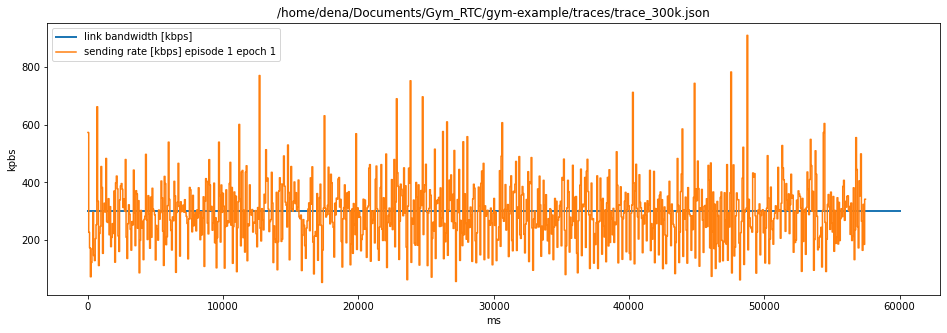

In [94]:
#Plot
plt.figure(figsize=(16,5))
plt.title(trace_name)
plt.step(time, capacities, lw=2, label="link bandwidth [kbps]")
plt.step(sending_rate_df.index, sending_rate_df["sending_rate"], \
         label=f"sending rate [kbps] episode {episode+1} epoch {epoch+1}")
plt.ylabel("kpbs")
plt.xlabel("ms")
plt.legend()
# plt.ylim(0,10)
# plt.xlim(0,10)

## Receiving rate

In [ ]:
def calculate_receiving_rate_from_packet_list(df_packets, interval=60):
    #calculates rate for given packet list df_packets for given interval for the first ssrc
    
    ssrc = df_packets["ssrc"].unique()[0]
    df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
    df["arrival_time_ms"] = df["arrival_time_ms"].astype('datetime64[ms]')
    df = df.set_index("arrival_time_ms")
    
    def calculate_rate(series):
#         interval = 100
        return (series.sum() * 8 * 1000 )/ interval

    receiving_rate_series = df.resample(f"{interval}L").agg({"payload_size": calculate_rate})
    
    return receiving_rate_series

In [85]:
receiving_rate = calculate_receiving_rate_from_packet_list(df_packets, interval=60)
receiving_rate_df = receiving_rate.reset_index().rename(columns={"payload_size": "receiving_rate"})
receiving_rate_df

,arrival_time_ms,receiving_rate
0,1970-01-01 00:00:00.060,190800.000000
1,1970-01-01 00:00:00.120,190800.000000
2,1970-01-01 00:00:00.180,381866.666667
3,1970-01-01 00:00:00.240,190933.333333
4,1970-01-01 00:00:00.300,363600.000000
...,...,...
994,1970-01-01 00:00:59.700,426533.333333
995,1970-01-01 00:00:59.760,165066.666667
996,1970-01-01 00:00:59.820,416800.000000
997,1970-01-01 00:00:59.880,185600.000000


In [90]:
ssrc = df_packets["ssrc"].unique()[0]
df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
df["arrival_time_ms"] = df["arrival_time_ms"].astype('datetime64[ms]')
df = df.set_index("arrival_time_ms")
df

,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
arrival_time_ms,,,,,,,
1970-01-01 00:00:00.117,24,0,1431,126,35,1,12648429
1970-01-01 00:00:00.157,24,0,1431,126,45,2,12648429
1970-01-01 00:00:00.196,24,0,1432,126,55,3,12648429
1970-01-01 00:00:00.236,24,0,1432,126,65,4,12648429
1970-01-01 00:00:00.276,24,0,1432,126,85,5,12648429
...,...,...,...,...,...,...,...
1970-01-01 00:00:59.878,24,0,696,126,57434,2193,12648429
1970-01-01 00:00:59.898,24,0,696,126,57469,2194,12648429
1970-01-01 00:00:59.918,24,0,696,126,57499,2195,12648429


In [91]:
time_step = 60

episode = 0
epoch = 0
            
#Define rate
receiving_rate_df

receiving_rate_df["receiving_rate"] = receiving_rate_df["receiving_rate"]/1000
t = np.arange(len(receiving_rate_df))*time_step
receiving_rate_df["time"] = t
receiving_rate_df.set_index("time", inplace=True)
receiving_rate_df

,arrival_time_ms,receiving_rate
time,,
0,1970-01-01 00:00:00.060,190.800000
60,1970-01-01 00:00:00.120,190.800000
120,1970-01-01 00:00:00.180,381.866667
180,1970-01-01 00:00:00.240,190.933333
240,1970-01-01 00:00:00.300,363.600000
...,...,...
59640,1970-01-01 00:00:59.700,426.533333
59700,1970-01-01 00:00:59.760,165.066667
59760,1970-01-01 00:00:59.820,416.800000


In [96]:
# #Define capacity
trace_name = l_packets[episode][epoch]["trace"]

with open(trace_name, "r") as f:
    d = json.load(f)

df = pd.DataFrame(d["uplink"]["trace_pattern"])
time = [0] + list(df["duration"].cumsum())
capacities = [df["capacity"].iloc[0]] + list(df["capacity"])
print("Capacities", capacities)

Capacities [300, 300]


In [ ]:
#Plot
plt.figure(figsize=(16,5))
plt.title(trace_name)
plt.step(time, capacities, lw=2, label="link bandwidth [kbps]")
plt.step(receiving_rate_df.index, receiving_rate_df["receiving_rate"], \
         label=f"receiving rate [kbps] episode {episode+1} epoch {epoch+1}")
plt.ylabel("kpbs")
plt.xlabel("ms")
plt.legend()
# plt.ylim(0,10)
# plt.xlim(0,10)

## Plot both sending and receiving rate

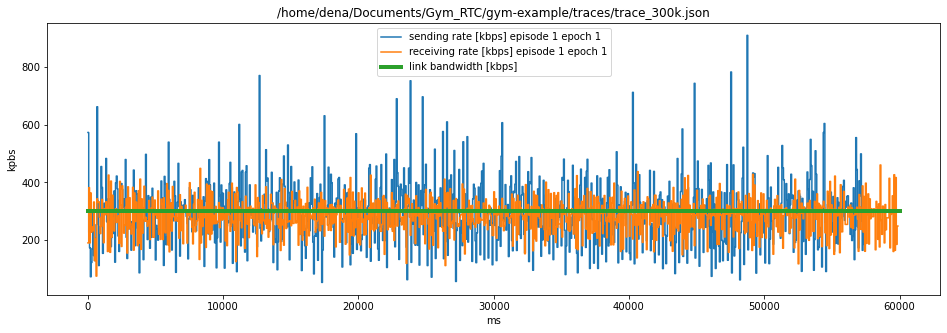

In [100]:
#Plot 
plt.figure(figsize=(16,5))
plt.title(trace_name)
plt.step(sending_rate_df.index, sending_rate_df["sending_rate"], \
         label=f"sending rate [kbps] episode {episode+1} epoch {epoch+1}")
plt.step(receiving_rate_df.index, receiving_rate_df["receiving_rate"], \
         label=f"receiving rate [kbps] episode {episode+1} epoch {epoch+1}")
plt.step(time, capacities, lw=4, label="link bandwidth [kbps]")
plt.ylabel("kpbs")
plt.xlabel("ms")
plt.legend()
# plt.ylim(0,10)
# plt.xlim(0,100)

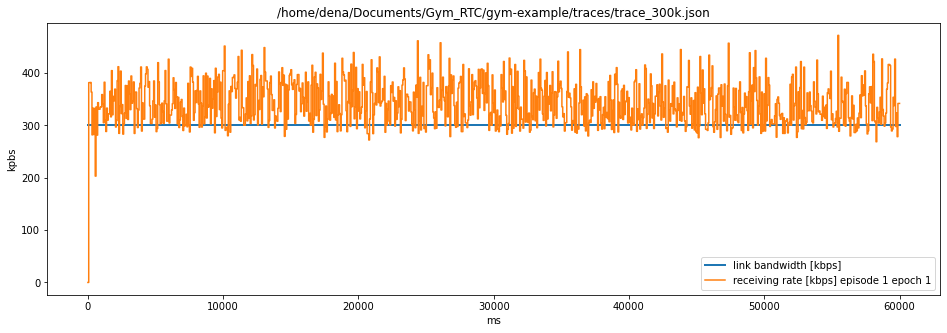

In [83]:
#### FROM RECEIVING_RATE_PER_EPISODE

pickle_path = "/home/dena/Documents/Gym_RTC/gym-example/receiving_rate_per_episode.pickle"
l_rate = pd.read_pickle(pickle_path)
time_step = 60
max_num_episodes = 3

episode = 0
epoch = 0
            
#Define rate
df_rate = pd.DataFrame(l_rate[episode][epoch]["receiving_rate"], columns=["receiving_rate", "arrival_time_ms"])
df_rate["receiving_rate"] = df_rate["receiving_rate"]/1000
t = np.arange(len(df_rate))*time_step
df_rate["time"] = t
df_rate.set_index("time", inplace=True)

#Define capacity
trace_name = l_rate[episode][epoch]["trace"]

with open(trace_name, "r") as f:
    d = json.load(f)

df = pd.DataFrame(d["uplink"]["trace_pattern"])
time = [0] + list(df["duration"].cumsum())
capacities = [df["capacity"].iloc[0]] + list(df["capacity"])

plt.figure(figsize=(16,5))
plt.title(trace_name)
plt.step(time, capacities, lw=2, label="link bandwidth [kbps]")
plt.step(df_rate.index, df_rate["receiving_rate"], \
         label=f"receiving rate [kbps] episode {episode+1} epoch {epoch+1}")
plt.ylabel("kpbs")
plt.xlabel("ms")
plt.legend()
# plt.ylim(0,500)
#             plt.xlim(0,10)